In [1]:
import pandas as pd
import math
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format



In [2]:
or_crime_data = pd.read_csv('or_offenses_known_to_law_enforcement_oregon_by_city_2013.csv', skiprows=4, skipfooter=2, engine='python')

or_crime_data


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson,Unnamed: 13
0,Albany,"51,645",40,0,nan,8.000,27,5,"2,019",252,"1,625",142,6,nan
1,Amity,"1,624",1,0,1.000,nan,0,0,26,1,25,0,1,nan
2,Ashland,"20,455",33,0,5.000,nan,7,21,674,76,585,13,10,nan
3,Astoria,"9,543",33,0,nan,3.000,1,29,445,89,324,32,3,nan
4,Athena,"1,144",1,0,1.000,nan,0,0,25,5,19,1,0,nan
5,Aumsville,"3,738",6,0,0.000,nan,1,5,82,20,59,3,0,nan
6,Baker City,"9,660",27,0,nan,1.000,2,24,370,68,293,9,5,nan
7,Bandon,"3,039",1,0,nan,0.000,1,0,88,24,59,5,1,nan
8,Banks,"1,862",4,0,nan,0.000,0,4,26,5,17,4,1,nan
9,Beaverton,"93,551",124,1,nan,20.000,22,81,"1,471",175,"1,213",83,15,nan


In [3]:
or_crime_data.dropna(axis=1, how='all', inplace=True)
or_crime_data2 = or_crime_data.fillna(0)
or_crime_data2
#print(or_crime_data2[or_crime_data2['Population'].isnull()])
or_crime_data2.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Albany,"51,645",40,0,0.000,8.000,27,5,"2,019",252,"1,625",142,6
1,Amity,"1,624",1,0,1.000,0.000,0,0,26,1,25,0,1
2,Ashland,"20,455",33,0,5.000,0.000,7,21,674,76,585,13,10
3,Astoria,"9,543",33,0,0.000,3.000,1,29,445,89,324,32,3
4,Athena,"1,144",1,0,1.000,0.000,0,0,25,5,19,1,0


In [4]:
pd.np.where(or_crime_data2['Population'].str.contains("NaN"))
or_crime_data2.drop(or_crime_data2.index[[11,93]], inplace=True)
#remember the "NaN" and "Inf" do not change when using fillna and dropna

In [5]:
type(or_crime_data2['Robbery'][4])

numpy.int64

In [6]:

or_crime_data2clean = pd.DataFrame()

or_crime_data2clean['City'] = or_crime_data2['City']
or_crime_data2clean['Population'] = or_crime_data2['Population'].str.replace(',', '').astype(int)
or_crime_data2clean['Population2'] = or_crime_data2clean['Population'] **2
or_crime_data2clean['Property Crime'] = or_crime_data2['Property\ncrime'].str.replace(',' , '').astype(int)
or_crime_data2clean['Robbery'] = or_crime_data2.Robbery
or_crime_data2clean['Robbery_bi'] = or_crime_data2clean['Robbery'].apply(lambda x: 1 if x > 0 else 0)
or_crime_data2clean['Murder'] = or_crime_data2['Murder and\nnonnegligent\nmanslaughter']
or_crime_data2clean['Murder_bi'] = or_crime_data2clean['Murder'].apply(lambda x: 1 if x > 0 else 0)

#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
or_crime_data2clean

                                                 

,City,Population,Population2,Property Crime,Robbery,Robbery_bi,Murder,Murder_bi
0,Albany,51645,-1627761271,2019,27,1,0,0
1,Amity,1624,2637376,26,0,0,0,0
2,Ashland,20455,418407025,674,7,1,0,0
3,Astoria,9543,91068849,445,1,1,0,0
4,Athena,1144,1308736,25,0,0,0,0
5,Aumsville,3738,13972644,82,1,1,0,0
6,Baker City,9660,93315600,370,2,1,0,0
7,Bandon,3039,9235521,88,1,1,0,0
8,Banks,1862,3467044,26,0,0,0,0
9,Beaverton,93551,161855009,1471,22,1,1,1


In [7]:
or_crime_data2clean.dtypes

City              object
Population         int32
Population2        int32
Property Crime     int32
Robbery            int64
Robbery_bi         int64
Murder             int64
Murder_bi          int64
dtype: object

In [12]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = or_crime_data2clean['Population']
X = or_crime_data2clean[['Murder', 'Robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [4030.60556963  589.37998374]

Intercept: 
 9996.137798671023

R-squared:
0.9337107968603404


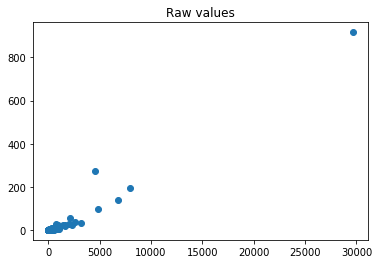

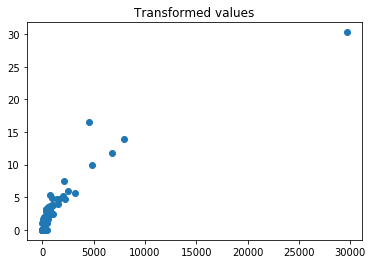

In [13]:
# Sample data.
outcome = or_crime_data2clean['Property Crime']
feature = or_crime_data2clean['Robbery']

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

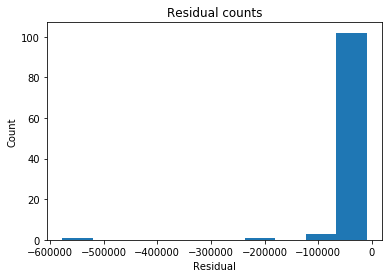

In [14]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = or_crime_data2clean['Property Crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

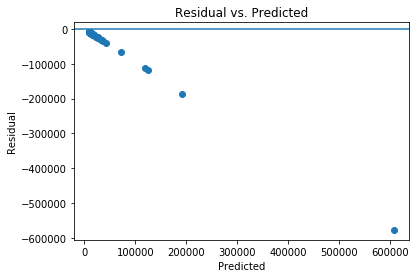

In [15]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [16]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Murder,Robbery
Murder,1.000,0.907
Robbery,0.907,1.000
